# Predicting Log Error in Zillow
By Qinzhi Chen and Rajesh Lamichhane
<hr style="border-bottom: 10px groove brown; margin-top: 10px; margin-bottom: 10px"></hr>

In [1]:
# team-made modules
import wrangle_final
import model_final
import explore_final
# libraries 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PolynomialFeatures
from sklearn.linear_model import LinearRegression, TweedieRegressor, LassoLars
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.cluster import KMeans
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# Project Overview and Goals
- The project uses the Zillow provided dataset and incorporate the clustering methodologies to find out the which feature best predict the logerror
- The project also going to use the regression methodologies to predict the logerror
- The Goal of this project is to identify factors affecting deviation of the logerror in the Zillow dataset
- The project will also utilize the machine learning algorithms to create a model 
- The project will also going to to utilize the statistic, hypothesis, and visualization to provide a easy to interpret result

# Wrangle Data (Acquire and Prepare)

In [2]:
# The acquisition came from a already built module from the team
zillow_train, zillow_validate, zillow_test=wrangle_final.wrangled_file()

In [3]:
# retireve basic information about the data
wrangle_final.zillow_info()

The basic stats about zillow dataframe is:  
                  id      parcelid  airconditioningtypeid  \
count  7.738000e+04  7.738000e+04           24953.000000   
mean   1.495126e+06  1.300715e+07               1.813289   
std    8.609057e+05  3.481368e+06               2.967894   
min    3.490000e+02  1.071186e+07               1.000000   
25%    7.520500e+05  1.153830e+07               1.000000   
50%    1.497870e+06  1.253155e+07               1.000000   
75%    2.240480e+06  1.421184e+07               1.000000   
max    2.982274e+06  1.676893e+08              13.000000   

       architecturalstyletypeid  basementsqft   bathroomcnt    bedroomcnt  \
count                206.000000     50.000000  77380.000000  77380.000000   
mean                   7.388350    679.720000      2.299134      3.053489   
std                    2.734542    689.703546      0.996657      1.139103   
min                    2.000000     38.000000      0.000000      0.000000   
25%                    7.000

In [4]:
# check if the module successfully handled null values
zillow_train.isnull().sum()

bathroom                      0
bedroom                       0
calculatedbathnbr             0
sqtft                         0
finishedsquarefeet12          0
fips                          0
fullbathcnt                   0
latitude                      0
longitude                     0
propertycountylandusecode     0
rawcensustractandblock        0
zipcode                       0
roomcnt                       0
yearbuilt                     0
structuretaxvaluedollarcnt    0
taxvalue                      0
assessmentyear                0
landtaxvaluedollarcnt         0
taxamount                     0
censustractandblock           0
logerror                      0
propertylandusedesc           0
county                        0
taxrate                       0
month                         0
age                           0
dtype: int64

## Key Takeway
- The module acquire all required data from the SQL database
- The module created a local file after acquired the data
- The module delete any columns that have over 40% nulls or more than 50% nulls
- The module fianlized with 70898 rows.
- The module also removed the outlier and drop null values to finalize the acquisition process
- The module split the data to train, validate, and test
- The module created a scale function for later use
- The module ended up with 26 coloumns, with 20 of them are float, 1 int, and 5 ojects
- The module also created four new columns in prepare for the exploration

# Exploration & Clustering

In [5]:
# use module in wrangle final to scale the columns in prepare for clustering and explore
scaled_train,scaled_validate,scaled_test=wrangle_final.scale_data(zillow_train,zillow_validate,zillow_test,cols=['bathroom','bedroom','taxrate','month','age','sqtft'])

In [6]:
# after scaled bathroom, bedroom, taxrate
scaled_train

,bathroom,bedroom,calculatedbathnbr,sqtft,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,propertycountylandusecode,...,county,taxrate,month,age,bathroom_scaled,bedroom_scaled,taxrate_scaled,month_scaled,age_scaled,sqtft_scaled
0,1.0,2.0,1.0,1128.0,1128.0,6037.0,1.0,33947371.0,-118157346.0,0100,...,"Los Angeles County, CA",0.012420,7,73.0,0.000000,0.250,0.066853,0.750,0.507692,0.253704
1,1.0,3.0,1.0,1252.0,1252.0,6037.0,1.0,34141060.0,-118115780.0,0100,...,"Los Angeles County, CA",0.012178,6,100.0,0.000000,0.375,0.065527,0.625,0.715385,0.285937
2,1.0,3.0,1.0,2093.0,2093.0,6037.0,1.0,34055226.0,-118314194.0,0100,...,"Los Angeles County, CA",0.012079,8,99.0,0.000000,0.375,0.064986,0.875,0.707692,0.504549
3,2.5,4.0,2.5,2200.0,2200.0,6059.0,2.0,33642576.0,-117689783.0,122,...,"Orange County, CA",0.010447,8,48.0,0.272727,0.500,0.056036,0.875,0.315385,0.532363
4,1.0,3.0,1.0,1389.0,1389.0,6059.0,1.0,33866740.0,-117961748.0,122,...,"Orange County, CA",0.012560,6,69.0,0.000000,0.375,0.067625,0.625,0.476923,0.321549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39718,2.5,3.0,2.5,2254.0,2254.0,6059.0,2.0,33755262.0,-118017324.0,122,...,"Orange County, CA",0.011705,8,23.0,0.272727,0.375,0.062937,0.875,0.123077,0.546400
39719,1.0,2.0,1.0,945.0,945.0,6037.0,1.0,34166305.0,-118112897.0,0100,...,"Los Angeles County, CA",0.011720,1,99.0,0.000000,0.250,0.063019,0.000,0.707692,0.206135
39720,1.0,2.0,1.0,834.0,834.0,6037.0,1.0,33997098.0,-118087683.0,0101,...,"Los Angeles County, CA",0.012740,7,72.0,0.000000,0.250,0.068609,0.750,0.500000,0.177281
39721,1.0,2.0,1.0,884.0,884.0,6037.0,1.0,33967821.0,-118304074.0,0100,...,"Los Angeles County, CA",0.012392,8,74.0,0.000000,0.250,0.066704,0.875,0.515385,0.190278


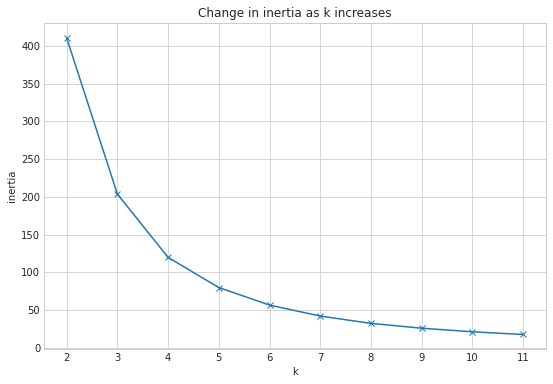

In [7]:
# Find out the best clusters
explore_final.cluster(scaled_train)

In [8]:
# the scaled version will be added as new columns
scaled_train

,bathroom,bedroom,calculatedbathnbr,sqtft,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,propertycountylandusecode,...,taxrate,month,age,bathroom_scaled,bedroom_scaled,taxrate_scaled,month_scaled,age_scaled,sqtft_scaled,cluster
0,1.0,2.0,1.0,1128.0,1128.0,6037.0,1.0,33947371.0,-118157346.0,0100,...,0.012420,7,73.0,0.000000,0.250,0.066853,0.750,0.507692,0.253704,2
1,1.0,3.0,1.0,1252.0,1252.0,6037.0,1.0,34141060.0,-118115780.0,0100,...,0.012178,6,100.0,0.000000,0.375,0.065527,0.625,0.715385,0.285937,2
2,1.0,3.0,1.0,2093.0,2093.0,6037.0,1.0,34055226.0,-118314194.0,0100,...,0.012079,8,99.0,0.000000,0.375,0.064986,0.875,0.707692,0.504549,0
3,2.5,4.0,2.5,2200.0,2200.0,6059.0,2.0,33642576.0,-117689783.0,122,...,0.010447,8,48.0,0.272727,0.500,0.056036,0.875,0.315385,0.532363,0
4,1.0,3.0,1.0,1389.0,1389.0,6059.0,1.0,33866740.0,-117961748.0,122,...,0.012560,6,69.0,0.000000,0.375,0.067625,0.625,0.476923,0.321549,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39718,2.5,3.0,2.5,2254.0,2254.0,6059.0,2.0,33755262.0,-118017324.0,122,...,0.011705,8,23.0,0.272727,0.375,0.062937,0.875,0.123077,0.546400,0
39719,1.0,2.0,1.0,945.0,945.0,6037.0,1.0,34166305.0,-118112897.0,0100,...,0.011720,1,99.0,0.000000,0.250,0.063019,0.000,0.707692,0.206135,2
39720,1.0,2.0,1.0,834.0,834.0,6037.0,1.0,33997098.0,-118087683.0,0101,...,0.012740,7,72.0,0.000000,0.250,0.068609,0.750,0.500000,0.177281,2
39721,1.0,2.0,1.0,884.0,884.0,6037.0,1.0,33967821.0,-118304074.0,0100,...,0.012392,8,74.0,0.000000,0.250,0.066704,0.875,0.515385,0.190278,2


## Key Takeaway so far
- The best cluster is three, a new column call cluster created to reflect the finding
- The columns we scaled is bathroom, bedroom, sqtft, taxrate, month and age, new scaled columns added

## Question 1
- Whether there are correlation between sqtft and logerror

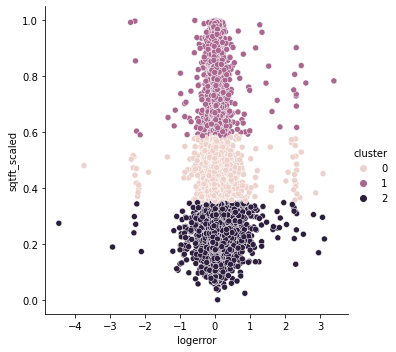

In [9]:
# check the cluster, if we can locate them
sns.relplot(data=scaled_train, 
            x='logerror', 
            y='sqtft_scaled',
           hue='cluster')

## Takeaway from the cluster 
It looks like they could have a cluster labeled, but it doesn't help to answer the question we have here: whether there are correlation between logerror and sqtft

In [10]:
corr, p = stats.pearsonr(scaled_train.sqtft_scaled, scaled_train.logerror)
corr, p

(0.02073824307949492, 3.5716077888022605e-05)

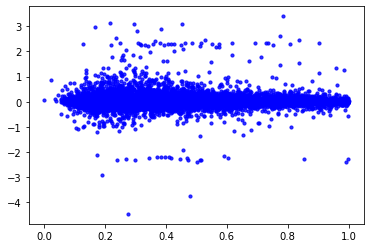

In [11]:
plt.scatter(scaled_train.sqtft_scaled, scaled_train.logerror, s=10, c='blue', alpha=.8)

## Takeaway from stat correlation test
- The correlation between the sqtft and logerror are very minimal.
- The sqtft probably doesn't play significant role in this situation
- Further investigation needed.

## Question 1 Takeaway
- The sqtft doesn't play high correlation role with logerror, but the cluster showed similar object in dataset, vertically.
- The next question show focus on whether the bedroom and bathroom have significant role with logerror

# Question 2
- Whether the bedroom, bathroom, and logerror have significant relationship

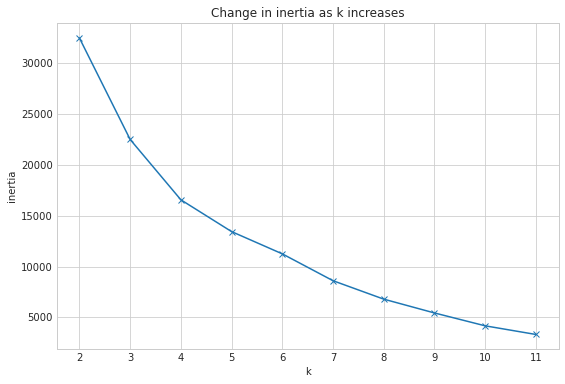

In [12]:
# put them into test.
explore_final.cluster2(scaled_train)

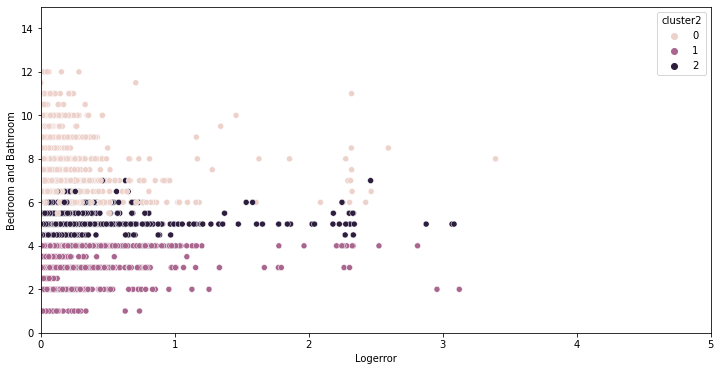

In [13]:
scaled_train['rooms']=scaled_train.bathroom+scaled_train.bedroom
plt.figure(figsize=(12,6))
sns.scatterplot(y=scaled_train.rooms,x=scaled_train.logerror, hue=scaled_train.cluster2)
plt.xlabel("Logerror")
plt.ylabel("Bedroom and Bathroom")
plt.ylim(0, 15)
plt.xlim(0, 5)
plt.show()

## Cluster takeaway
- The grouping in this cluster is not obvious in the center, but we can identify that as the room increase the cluster grouping is obvious

In [14]:
# H0= There is no signficant difference between the logerror means of bedroom and bathroom cluster group.
# Ha= There is a signficant difference between the logerror means of at least two cluster groups.

In [15]:
alpha = 0.05

F, p = stats.f_oneway(scaled_train.bathroom_scaled, scaled_train.bedroom_scaled, scaled_train.logerror)

print('Anova Test Results on Room Cluster')
print('F-value: ',F)
print('p-value: ',p)
if p > alpha:
    print("\nWe fail to reject null hypothesis.")

else:
    print("We reject null hypothesis\n\n")

Anova Test Results on Room Cluster
F-value:  62540.246274163714
p-value:  0.0
We reject null hypothesis




<AxesSubplot:xlabel='rooms', ylabel='logerror'>

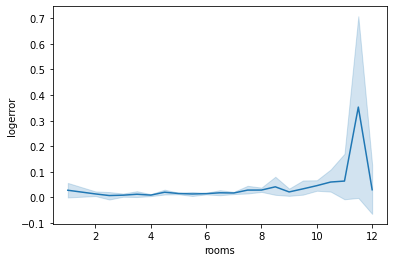

In [16]:
sns.lineplot(data=scaled_train, x = 'rooms' ,y= 'logerror')

## Question 2 Key takeway
- The result is that the bedroom and bathroom doesn't have significant role in logerror
- the cluster also didn't show any significant grouping 
- we believe there should be some relationship between bedroom, bathroom, and logerror, but it is not significant enough to identify it 
- There will be high logerror when the room are increasing from 10 to 12

# Question 3
- whether the county has similar logerror

In [17]:
# setting up the environment for the test
orange = scaled_train[scaled_train.county == 'Orange County, CA'].logerror
ventura = scaled_train[scaled_train.county == 'Ventura County, CA'].logerror
LA = scaled_train[scaled_train.county == 'Los Angeles County, CA'].logerror

(<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>)

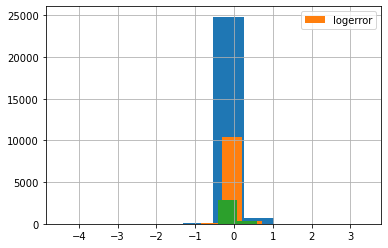

In [18]:
LA.hist(),orange.hist(legend=True),ventura.hist()


In [19]:
LA.var(),orange.var(),ventura.var()

(0.02231601276647476, 0.03099152903434467, 0.023677004668660125)

In [20]:
alpha = 0.05

F, p = stats.f_oneway(orange, ventura, LA)

print('Anova Test Results on county')
print('F-value: ',F)
print('p-value: ',p)
if p > alpha:
    print("\nWe fail to reject null hypothesis.")

else:
    print("We reject null hypothesis\n\n")

Anova Test Results on county
F-value:  4.498773211057824
p-value:  0.011128301318917455
We reject null hypothesis




## Question 3 Key Takeaway
- The logerrors are different in different county
- The hist shows that the ventura has more likely to have negative logerror while the orange and LA are more central
- The hypothesis with ANOVA variable analysis revealed that the orange county has higher variable than other two counties


# Question 4
- Whether the logerror and age could have significant group

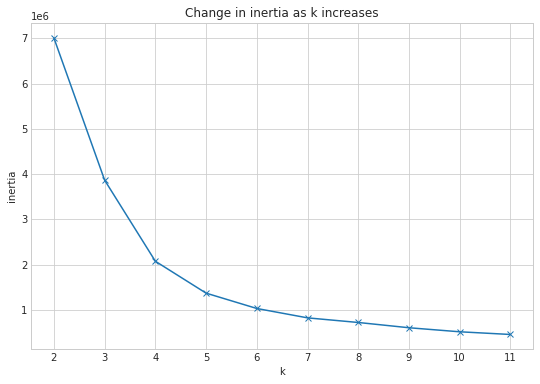

In [21]:
explore_final.cluster3(scaled_train)

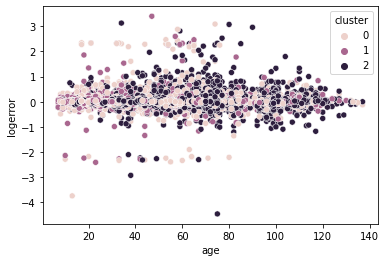

In [22]:
sns.scatterplot(y = 'logerror', x= 'age', data = scaled_train, hue = 'cluster')
plt.show()

<AxesSubplot:xlabel='age', ylabel='logerror'>

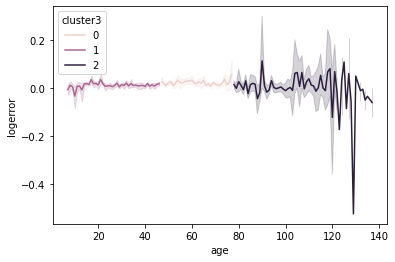

In [23]:
sns.lineplot(data=scaled_train, x = 'age' ,y= 'logerror', hue='cluster3')

## Question 4 Key takeaway
- The age illustrated a similar trend with the sqtft (ref. question 1).
- However, the logerror are more likely to show positive trend when it is older than 80 years old .
- After 120 years old, the house will show significant negative logerror and positive logerror
- The likelyhood for the logerror to show positive is higher than likelyhood to show negative when the age is under 80

# Exploration Summary
- The exploration took place with 3 hypothesis tests, and three clustering, and more than 9 visualizations
- The exploration revealed that the house age has played significant role in logerror after 80 years.
- The exploration also revealed that the house in Orange County has significant variance compare to the other counties
- The exploration revealed that the Ventura county is more likely to have negative log error compare to the other two counties
- The exploration found that the logerror will increase when the room numbers increase to 9
- The grouping in this cluster is not obvious in the center, but we can identify that as the room increase the cluster grouping is obvious

# Modeling

In [24]:
x_train, y_train,x_validate,y_validate,x_test,y_test=model_final.x_y_split(zillow_train,zillow_validate,zillow_test)
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test=pd.DataFrame(y_test)
y_train['baseline'] = y_train['logerror'].mean()
y_validate['baseline'] = y_validate['logerror'].mean()
y_test['baseline']=y_test['logerror'].mean()

In [25]:
models=model_final.models(y_train)
models

,model,rmse,r^2
0,baseline,0.15743,0.0


In [26]:
models=models.append(model_final.modeling_train(LassoLars(alpha=1.0), 
                  x_train, 
                  y_train, 
                  x_validate, 
                  y_validate, 
                  scores=models), ignore_index=True)

model name?LAR


In [27]:
models=models.append(model_final.modeling_train(LinearRegression(normalize=True), 
                  x_train, 
                  y_train, 
                  x_validate, 
                  y_validate, 
                  scores=models), ignore_index=True)

model name?LinearRegression


In [28]:
kbest = SelectKBest(f_regression, k=3)
kbest.fit(x_train, y_train.logerror)
mask = x_train.columns[kbest.get_support()].to_list()
models=models.append(model_final.modeling_train(LinearRegression(), 
                  x_train[mask], 
                  y_train, 
                  x_validate[mask], 
                  y_validate, 
                  scores=models), ignore_index=True)

model name?Kbest


In [29]:
scaler=MinMaxScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), index=x_train.index, columns=x_train.columns)
x_validate_scaled = pd.DataFrame(scaler.fit_transform(x_validate), index=x_validate.index, columns=x_validate.columns)
x_test_scaled = pd.DataFrame(scaler.fit_transform(x_test), index=x_test.index, columns=x_test.columns)
polyfeats = PolynomialFeatures(degree=2)
x_train_quad = polyfeats.fit_transform(x_train_scaled)
x_val_quad = polyfeats.transform(x_validate_scaled)
models = models.append(model_final.modeling_train(LinearRegression(), 
                  x_train_quad, 
                  y_train, 
                  x_val_quad, 
                  y_validate, 
                  scores=models), ignore_index=True)

model name?Poly


In [30]:
models

,model,rmse,r^2
0,baseline,0.157430,0.000000
1,LAR,0.157430,0.000000
2,LinearRegression,0.157252,0.002636
3,Kbest,0.157273,0.001998
4,Poly,0.156910,0.006599


In [31]:
# use in validate 
# the Polinominal regression model
scaler=MinMaxScaler()
x__train_scaled = pd.DataFrame(scaler.fit_transform(x_train), index=x_train.index, columns=x_train.columns)
x_validate_scaled = pd.DataFrame(scaler.fit_transform(x_validate), index=x_validate.index, columns=x_validate.columns)
x_test_scaled = pd.DataFrame(scaler.fit_transform(x_test), index=x_test.index, columns=x_test.columns)
polyfeats = PolynomialFeatures(degree=2)
x_train_quad = polyfeats.fit_transform(x_train_scaled)
x_val_quad = polyfeats.transform(x_validate_scaled)
models = models.append(model_final.modeling_validate(LinearRegression(), 
                  x_train_quad, 
                  y_train, 
                  x_val_quad, 
                  y_validate, 
                  scores=models), ignore_index=True)

model name?Poly_val


In [32]:
models

,model,rmse,r^2
0,baseline,1.574302e-01,0.000000e+00
1,LAR,1.574302e-01,0.000000e+00
2,LinearRegression,1.572518e-01,2.635940e-03
3,Kbest,1.572729e-01,1.998107e-03
4,Poly,1.569100e-01,6.598942e-03
5,Poly_val,1.520949e+09,-4.418156e+19


In [33]:
x_test_quad = polyfeats.transform(x_test_scaled)
models = models.append(model_final.modeling_test(LinearRegression(), 
                  x_test_quad, 
                  y_test,  
                  scores=models), ignore_index=True)

model name?Poly_test


In [34]:
# Polynominal has the .018 r squre result
models['r^2'].max()

0.018553718952905696